## Контрольное практическое задание

В этом задании вам нужно будет проанализировать корпус новостных статей, размеченных по темам, а затем обучить несколько классификаторов и сравнить качество их работы. В конце нужно будет сгенерировать три статьи и определить тему статей с помощью лучшего классификатора.

In [ ]:
import pandas as pd
# прочитаем csv-корпус и посмотрим на его содержимое
df_news = pd.read_csv('news.csv')
df_news.head()

,source,title,text,publication_date,rubric,subrubric,tags
0,lenta.ru,Синий богатырь,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-30T00:01:00+03:00,Экономика,Госэкономика,NaN
1,lenta.ru,Загитова согласилась вести «Ледниковый период»,Олимпийская чемпионка по фигурному катанию Ал...,2020-08-31T20:04:00+03:00,Спорт,Зимние виды,NaN
2,lenta.ru,Объяснена опасность однообразного питания,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31T20:07:00+03:00,Из жизни,Еда,NaN
3,lenta.ru,«Предохраняться? А зачем?»,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-30T00:04:00+03:00,Интернет и СМИ,ТВ и радио,NaN
4,lenta.ru,Ефремов систематически употреблял наркотики,Актер Михаил Ефремов систематически употребл...,2020-08-31T18:27:00+03:00,Культура,Кино,NaN


In [2]:
# если у вас возникнут проблемы со шрифтами, раскомментируйте нижние две строчки и обновите библиотеку Pillow
# %pip install --upgrade pip
# %pip install --upgrade Pillow

In [ ]:
df_news = pd.read_csv('news.csv')
df_news = df_news.drop(columns=['tags']) # чистим от нанов
df_news = df_news.dropna()


### Задание 1
Сначала напишите функции `str_corpus` (получение общей текстовой строки из списка слов) и `get_corpus` (получение списка всех слов в корпусе).    
С помощью библиотеки `wordcloud` напишите функцию, генерирующую облако только значимых слов.    
Затем постройте и отобразите
- общее облако слов по всему корпусу
- три облака слов по любым трём темам
  
на графике с помощью matplotlib.

In [35]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jingni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: >

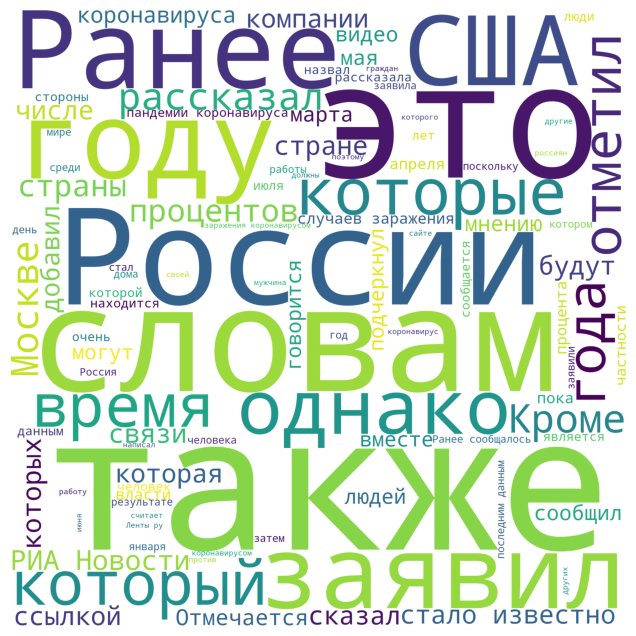

In [37]:
# Получение текстовой строки из списка слов
def str_corpus(corpus: list) -> str:
    corpus = " ".join(corpus)


    return corpus


# Получение списка всех слов в корпусе
def get_corpus(data: pd.DataFrame) -> list:
    corpus = [w for d in data for w in d.split() ]
    return corpus


# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              width=2000,
                              height=2000,
                              max_words=100,
                              random_state=40,
                              stopwords = stop_words_nltk
                         ).generate(str_corpus(corpus))
    return wordCloud


corpus = get_corpus(df_news['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

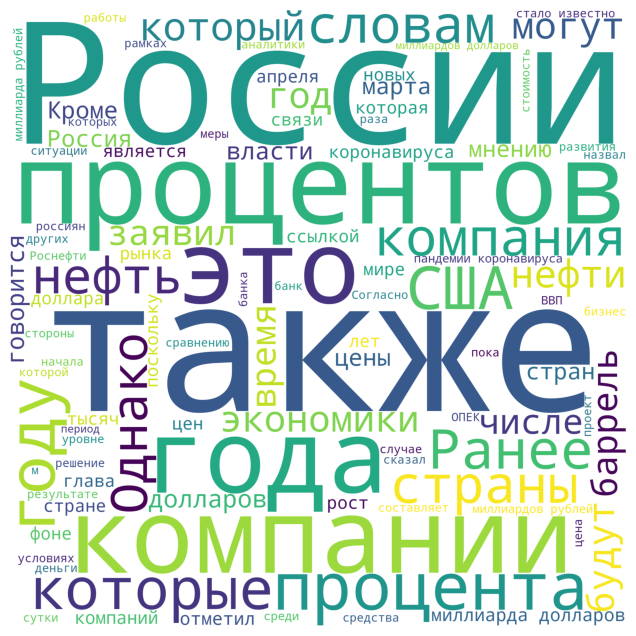

In [38]:

corpus = get_corpus(df_news.loc[df_news['rubric'] == "Экономика", "text"].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

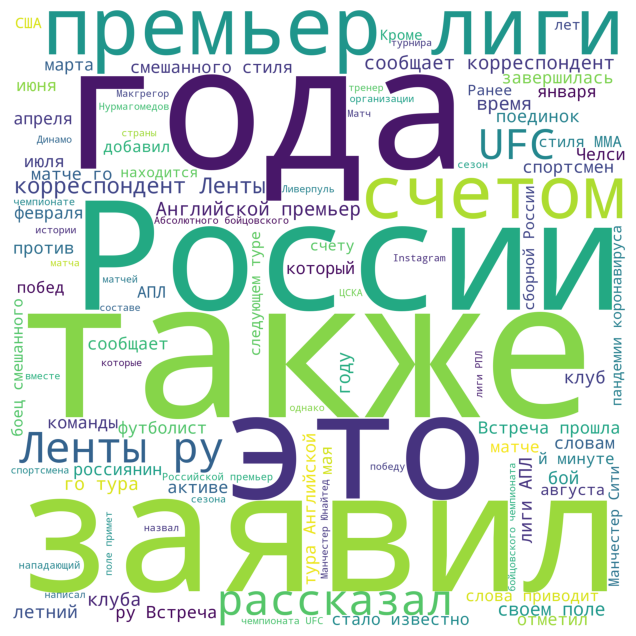

In [39]:

corpus = get_corpus(df_news.loc[df_news['rubric'] == "Спорт", "text"].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

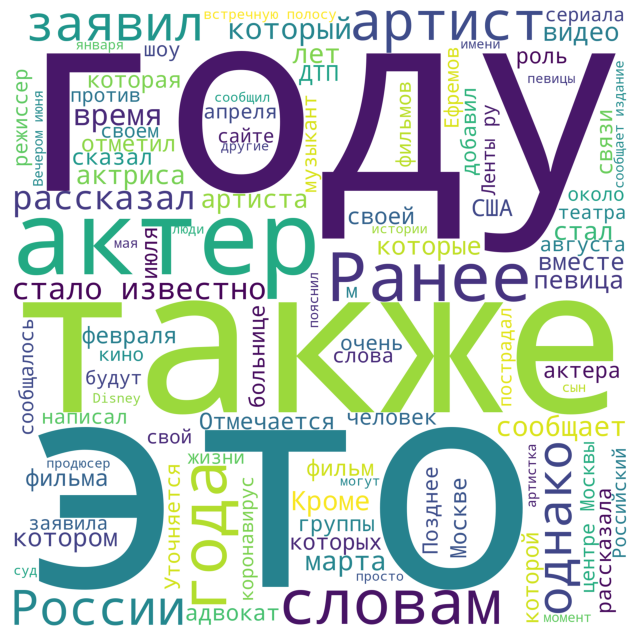

In [40]:

corpus = get_corpus(df_news.loc[df_news['rubric'] == "Культура", "text"].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

### Задание 2  

В первой строке укажите данные для обучения на месте многоточий: первый аргумент — значения из колонки `text` из нашего датафрейма, второй аргумент — значения из колонки `rubric` нашего датафрейма.  
Если у вас возникнет ошибка с неправильным типом данных используйте к выборке из датафрейма функцию `.astype('U')`.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_news['text'], df_news['rubric'], test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Задание 3  
1. Обучите поочерёдно все 6 классификаторов, импортированных выше, на данных `X_train, y_train` с помощью функции `fit()`
2. Предскажите темы для новостей из `X_test` с помощью функции `predict()`
3. Выведите `classification_report` для каждого классификатора (сравните предсказанные темы с темами из `y_test`)
4. Проанализируйте результаты и выберите лучший классификатор, приведя аргументы.

In [42]:
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.pipeline import Pipeline

# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.feature_extraction.text import TfidfVectorizer

# разные классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# набор метрик для оценки качества модели
from sklearn import metrics

In [43]:
# Шаблон обучения классификатора
# your_classifier = Pipeline([
#     ('tfidf', объект векторайзера),
#     ('clf', объект классификатора с настройками, если нужны])
# your_classifier.fit(...)

In [46]:
def classifier(clf):
    your_classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', clf)])
    your_classifier.fit(X_train, y_train)
    predicted = your_classifier.predict(X_test)
    print(metrics.classification_report(predicted, y_test))


In [52]:
print("LogisticRegression", classifier(LogisticRegression()))

                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         0
      Бывший СССР       0.79      0.86      0.82        63
              Дом       0.09      1.00      0.17         2
         Из жизни       0.55      0.81      0.65        21
   Интернет и СМИ       0.13      0.75      0.22         8
         Культура       0.40      0.83      0.54        23
              Мир       0.86      0.68      0.76       174
  Наука и техника       0.37      1.00      0.54        11
       Нацпроекты       0.17      1.00      0.29         2
      Путешествия       0.34      1.00      0.51        11
           Россия       0.90      0.49      0.63       306
Силовые структуры       0.53      0.90      0.67        20
            Спорт       0.95      0.96      0.95        74
         Ценности       0.44      0.92      0.60        13
        Экономика       0.83      0.77      0.80        77

         accuracy                           0.68      

C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: U

In [53]:
print("KNeighborsClassifier", classifier(KNeighborsClassifier()))

                   precision    recall  f1-score   support

   69-я параллель       0.40      0.50      0.44         4
      Бывший СССР       0.71      0.71      0.71        68
              Дом       0.50      0.69      0.58        16
         Из жизни       0.68      0.64      0.66        33
   Интернет и СМИ       0.47      0.59      0.52        37
         Культура       0.52      0.76      0.62        33
              Мир       0.82      0.71      0.76       160
  Наука и техника       0.63      0.76      0.69        25
       Нацпроекты       0.83      0.83      0.83        12
      Путешествия       0.72      0.79      0.75        29
           Россия       0.79      0.63      0.70       208
Силовые структуры       0.62      0.72      0.67        29
            Спорт       0.89      0.96      0.92        70
         Ценности       0.59      0.84      0.70        19
        Экономика       0.75      0.85      0.80        62

         accuracy                           0.72      

In [54]:
print("DecisionTreeClassifier", classifier(DecisionTreeClassifier()))

                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         2
      Бывший СССР       0.68      0.68      0.68        68
              Дом       0.18      0.19      0.19        21
         Из жизни       0.29      0.35      0.32        26
   Интернет и СМИ       0.17      0.22      0.19        37
         Культура       0.31      0.42      0.36        36
              Мир       0.54      0.52      0.53       145
  Наука и техника       0.27      0.23      0.25        35
       Нацпроекты       0.58      0.50      0.54        14
      Путешествия       0.44      0.50      0.47        28
           Россия       0.58      0.49      0.53       195
Силовые структуры       0.56      0.51      0.54        37
            Спорт       0.67      0.64      0.65        78
         Ценности       0.56      0.65      0.60        23
        Экономика       0.34      0.40      0.37        60

         accuracy                           0.48      

In [55]:
print("SGDClassifier", classifier(SGDClassifier()))

                   precision    recall  f1-score   support

   69-я параллель       0.20      0.50      0.29         2
      Бывший СССР       0.84      0.81      0.83        70
              Дом       0.36      0.80      0.50        10
         Из жизни       0.87      0.69      0.77        39
   Интернет и СМИ       0.47      0.81      0.59        27
         Культура       0.67      0.80      0.73        40
              Мир       0.88      0.79      0.83       155
  Наука и техника       0.80      0.80      0.80        30
       Нацпроекты       0.83      0.91      0.87        11
      Путешествия       0.84      0.93      0.89        29
           Россия       0.84      0.72      0.78       191
Силовые структуры       0.71      0.71      0.71        34
            Спорт       0.97      0.95      0.96        77
         Ценности       0.70      0.95      0.81        20
        Экономика       0.86      0.87      0.87        70

         accuracy                           0.80      

In [56]:
print("MultinomialNB", classifier(MultinomialNB()))

                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         0
      Бывший СССР       0.15      0.91      0.25        11
              Дом       0.00      0.00      0.00         0
         Из жизни       0.00      0.00      0.00         0
   Интернет и СМИ       0.00      0.00      0.00         0
         Культура       0.00      0.00      0.00         0
              Мир       0.57      0.68      0.62       115
  Наука и техника       0.00      0.00      0.00         0
       Нацпроекты       0.00      0.00      0.00         0
      Путешествия       0.00      0.00      0.00         0
           Россия       0.96      0.27      0.42       595
Силовые структуры       0.00      0.00      0.00         0
            Спорт       0.69      1.00      0.82        52
         Ценности       0.22      1.00      0.36         6
        Экономика       0.34      0.92      0.49        26

         accuracy                           0.41      

C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: U

In [57]:
print("RandomForestClassifier", classifier(RandomForestClassifier()))

                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         0
      Бывший СССР       0.79      0.81      0.80        67
              Дом       0.14      1.00      0.24         3
         Из жизни       0.45      0.70      0.55        20
   Интернет и СМИ       0.13      1.00      0.23         6
         Культура       0.35      0.74      0.48        23
              Мир       0.75      0.71      0.73       146
  Наука и техника       0.33      0.91      0.49        11
       Нацпроекты       0.50      0.86      0.63         7
      Путешествия       0.38      0.92      0.53        13
           Россия       0.89      0.44      0.59       333
Силовые структуры       0.53      0.72      0.61        25
            Спорт       0.92      0.95      0.93        73
         Ценности       0.59      0.94      0.73        17
        Экономика       0.69      0.80      0.74        61

         accuracy                           0.65      

C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jingni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: U

Лучше всего сработал SGDClassifier и по f-мере, и по полноте (precision)


### Задание 4  
Сгенерируйте три новости на основе трёх облак слов из задания 1 с помощью ChatGPT, [бота в телеграме](https://t.me/gpt3_unlim_chatbot), https://chatgptchatapp.com/ или любой другой доступной нейросети (приложите их ниже) и проверьте, правильно ли ваш лучший классификатор определит их тему (результат также укажите ниже).  

Можно использовать, например, следующий промпт:  
*напиши короткую новость на основе облака самых частых слов*

In [62]:
text1 = """В Москве сегодня открылась новая высокотехнологичная лаборатория по разработке искусственного интеллекта, специализирующаяся на применении ИИ в сфере медицины. Лаборатория, получившая название "МедИИ", оснащена современным оборудованием и привлекла ведущих российских специалистов в области машинного обучения и здравоохранения.

По словам представителей Министерства здравоохранения, "МедИИ" будет заниматься разработкой алгоритмов для ранней диагностики заболеваний, персонализированного лечения и автоматизации рутинных задач в медицинских учреждениях. В числе первых проектов лаборатории – система анализа медицинских изображений для выявления признаков рака легких и разработка виртуального помощника для врачей, помогающего принимать решения на основе больших данных.

Открытие лаборатории "МедИИ" является частью национальной стратегии развития искусственного интеллекта в России, направленной на внедрение ИИ-технологий в различные отрасли экономики и социальной сферы. Ожидается, что разработки лаборатории окажут значительное влияние на повышение качества медицинского обслуживания и снижение нагрузки на врачей. В ближайшие годы планируется открытие подобных центров и в других регионах страны."""

In [61]:
text2 = """"Роснефть" увеличила чистую прибыль на 30 процентов благодаря росту цен на нефть и оптимизации расходов

Москва Россия - [Дата] Сегодня компания "Роснефть" объявила о финансовых результатах за прошедший квартал сообщив о значительном увеличении чистой прибыли Чистая прибыль относящаяся к акционерам "Роснефти" выросла на 30 процентов по сравнению с аналогичным периодом прошлого года достигнув 500000000000 рублей

Основными факторами повлиявшими на рост прибыли стали

•  Увеличение средней цены на нефть: Средняя цена реализации нефти "Роснефти" увеличилась на 15 процентов благодаря благоприятной конъюнктуре мирового рынка
•  Оптимизация операционных расходов: Компания успешно реализовала программу по оптимизации операционных расходов что позволило сократить издержки на 7 процентов
•  Рост объемов добычи: "Роснефть" также сообщила об увеличении объемов добычи углеводородов на 3 процента благодаря эффективной работе новых месторождений

Представители "Роснефти" заявили что компания продолжит инвестировать в развитие новых проектов и технологий а также стремиться к дальнейшему повышению эффективности своей деятельности В частности планируется увеличение инвестиций в геологоразведку на 10 процентов в следующем году

Аналитики отмечают что "Роснефть" демонстрирует устойчивые финансовые результаты и продолжает укреплять свои позиции на мировом рынке Однако они также предупреждают о возможных рисках связанных с волатильностью цен на нефть и геополитической обстановкой

Дивиденды: Совет директоров "Роснефти" рекомендовал выплатить дивиденды за отчетный период в размере 25 рублей на акцию что соответствует 50 процентам от чистой прибыли"""

In [68]:
X_test

1056    Мастерская управления «Сенеж» запустила онлайн...
3215    В Нидерландах суд отложил до 23 марта слушания...
1532    Члены  Демократической партии  палаты представ...
828     В Новороссийске Краснодарского края врач Севак...
2372    Польская нефтегазовая компания PGNiG пригрозил...
                              ...                        
2049    Власти Швеции планируют пересмотреть подход к ...
1970    Отец и тренер российского бойца смешанного сти...
1540    Россия нацелена на создание военной базы в Лив...
878     Российский пилот команды «Формулы-1» Alpha Tau...
3602    Во Владикавказе местный житель похитил девушку...
Name: text, Length: 805, dtype: object

In [60]:
text3 = """Леонардо ДиКаприо получит почетную награду за вклад в экологию на кинофестивале в Каннах в 2024 году

Канны, Франция - [Дата] Леонардо ДиКаприо, известный актер и активный защитник окружающей среды, будет удостоен специальной награды за выдающийся вклад в дело защиты экологии во время Каннского кинофестиваля 2024 года. Церемония награждения состоится [Дата церемонии] в рамках гала-вечера, посвященного экологическим инициативам в кинематографе.

Организаторы фестиваля отметили, что ДиКаприо, получивший "Оскар" в 2016 году за роль в фильме "Выживший", на протяжении многих лет активно использует свою известность для привлечения внимания к проблемам изменения климата и сохранения биоразнообразия. Его документальные фильмы, такие как "11-й час" (2007) и "Перед потопом" (2016), вызвали широкий общественный резонанс и стимулировали дискуссии о необходимости принятия срочных мер по борьбе с глобальным потеплением.

"Леонардо ДиКаприо - это не только талантливый актер, но и выдающийся общественный деятель, который использует свой голос для защиты нашей планеты", - заявил представитель Каннского кинофестиваля. "Его страсть к экологии и его стремление вдохновлять других делают его идеальным кандидатом для этой почетной награды".

Сам ДиКаприо пока не прокомментировал предстоящее награждение. Однако известно, что он планирует принять участие в нескольких мероприятиях в рамках Каннского кинофестиваля 2024 года, посвященных экологическим темам, включая панельную дискуссию о влиянии кинематографа на экологическое сознание общества.

Награда будет вручена ДиКаприо лично [Имя вручающего награду], известным [Описание вручающего награду]. Ожидается, что церемония станет одним из самых ярких событий Каннского кинофестиваля 2024 года и привлечет внимание мировой общественности к вопросам охраны окружающей среды."""

ValueError: Iterable over raw text documents expected, string object received.